# Predicting Earnings from Census Data with Random Forests
taken from [The Analytics Edge](https://www.edx.org/course/analytics-edge-mitx-15-071x-3)

# The Task

The United States government periodically collects demographic information by conducting a census.

In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the UCI Machine Learning Repository.

The file `census.csv` contains 1994 census data for 31,978 individuals in the United States.

The dataset includes the following 13 variables:

- age = the age of the individual in years
- workclass = the classification of the individual's working status (does the person work for the federal government, work for the local government, work without pay, and so on)
-  education = the level of education of the individual (e.g., 5th-6th grade, high school graduate, PhD, so on)
- maritalstatus = the marital status of the individual
- occupation = the type of work the individual does (e.g., administrative/clerical work, farming/fishing, sales and so on)
- relationship = relationship of individual to his/her household
- race = the individual's race
- sex = the individual's sex
- capitalgain = the capital gains of the individual in 1994 (from selling an asset such as a stock or bond for more than the original purchase price)
- capitalloss = the capital losses of the individual in 1994 (from selling an asset such as a stock or bond for less than the original purchase price)
- hoursperweek = the number of hours the individual works per week
- nativecountry = the native country of the individual
- over50k = whether or not the individual earned more than $50,000 in 1994

**Predict whether an individual's earnings are above $50,000 (the variable "over50k") using all of the other variables as independent variables.**

In [22]:
import pandas as pd
import numpy as np

# Exercise 1

1. Read the dataset `census-2.csv`.
2. find out the name and the type of the single colums

In [23]:
census = pd.read_csv('../../data/census-2.csv')
census.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
census.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'over50k'],
      dtype='object')

In [25]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
workclass        31978 non-null object
education        31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
sex              31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
over50k          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Exercise 2
sklearn classification can only work with numeric values. Therefore we first have to convert all not-numeric values to numeric values.

1. convert the target column `over50k` to a boolean
2. convert the not-numeric independent variables (aka features, aka predictors) via `pd.get_dummies()`.
  - check the number of columns before and after applying `pd.get_dummies`
  - how did ``pd.get_dummies()` work?
  

See http://pbpython.com/categorical-encoding.html for further alternatives to convert not-numeric values to numeric values.

In [26]:
print(census.over50k.unique())
census.over50k = census.over50k==' >50K'
print("{0:.2f}% over 50k".format(100*np.mean(census.over50k)))

[' <=50K' ' >50K']
24.06% over 50k


In [27]:
census.shape

(31978, 13)

In [28]:
not_numeric_columns = ['workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'nativecountry']
census2 = pd.get_dummies(census, not_numeric_columns)
print(census2.shape)
census2.head()

(31978, 106)


,age,capitalgain,capitalloss,hoursperweek,over50k,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,39,2174,0,40,False,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,False,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,False,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,False,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,False,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Exercise 3
Separate target variable `over50k` from the independent variables (all others): 
`over50k -> y, all others -> X`

In [29]:
X = census2.drop(['over50k'], axis=1)
y = census2['over50k']
census2.shape, X.shape, y.shape

((31978, 106), (31978, 105), (31978,))

# Exercise 4
Then, split the data randomly into a training set and a testing set, setting the `random_state` to 2000 before creating the split. Split the data so that the training set contains 60% of the observations, while the testing set contains 40% of the observations.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2000)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19186, 105), (12792, 105), (19186,), (12792,))

# Exercise 5
Let us now build a classification tree to predict "over50k". Use the training set to build the model, and all of the other variables as independent variables. Use the default parameters.

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)

# Exercise 6
Which are the most important features? Plot Top 5 with `plotting_utilities.plot_feature_importances`.

Top 5 Feature importances: [ 0.22441314  0.11946429  0.10124393  0.07699015  0.03279287]


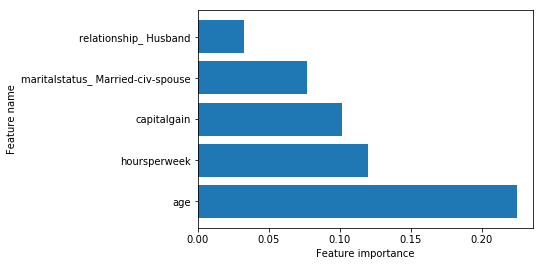

In [34]:
from plotting_utilities import plot_feature_importances
import matplotlib.pyplot as plt

%matplotlib inline
idx = np.argsort(clf.feature_importances_)[:-6:-1]
print('Top 5 Feature importances: {}'.format(clf.feature_importances_[idx]))
plot_feature_importances(clf, X_train.columns, 5)

# Exercise 7
- Predict for the test data and 
- compare with the actual outcome: 
  - Therefore plot the confusion matrix for the test-data and 
  - calculate the accuracy
      - for the trainings-data
      - for the test-data
      - how good is the accuracy in comparision to the Decision Tree?

In [35]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

print(" ------ Predicted ")
print(" Actual ")
confusion_matrix(y_test, y_pred)

 ------ Predicted 
 Actual 


array([[8983,  763],
       [1216, 1830]])

In [37]:
print('Accuracy of Random Forest classifier on train set with "score"-function: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set with "score"-function: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on train set with "score"-function: 0.97
Accuracy of Random Forest classifier on test set with "score"-function: 0.85
